# Poisonous mushrooms: Gaussian Mixture Models

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn import mixture
#from sklearn.mixture import GMM

import seaborn as sns

from itertools import product

import warnings
warnings.filterwarnings('ignore')

Load feature names.

In [2]:
feature_names = []
with open('mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

original_X = X

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


In [4]:
print(feature_names)

['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-color=red', 'gill-color=white'

(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [5]:
def P1():
### STUDENT START ###
    # Create PCA with 50 k-components
    print("Components(k)   Last Component    Var. Explained")
    print("=" * 50)
    for k in range(1, 51):
        pca = PCA(n_components=k)
        X_new = pca.fit_transform(X)
        print("{:7d} {:18.2%} {:18.2%}".format(len(pca.components_), pca.explained_variance_ratio_[-1],
                                    np.cumsum(pca.explained_variance_ratio_)[-1]))
### STUDENT END ###
P1()

Components(k)   Last Component    Var. Explained
      1             16.81%             16.81%
      2             13.89%             30.70%
      3              9.74%             40.45%
      4              6.34%             46.79%
      5              4.02%             50.80%
      6              3.69%             54.49%
      7              3.13%             57.62%
      8              2.77%             60.40%
      9              2.65%             63.05%
     10              2.08%             65.13%
     11              2.05%             67.18%
     12              1.86%             69.03%
     13              1.78%             70.81%
     14              1.69%             72.51%
     15              1.53%             74.04%
     16              1.53%             75.57%
     17              1.47%             77.04%
     18              1.40%             78.44%
     19              1.33%             79.78%
     20              1.15%             80.93%
     21              1.08%     

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

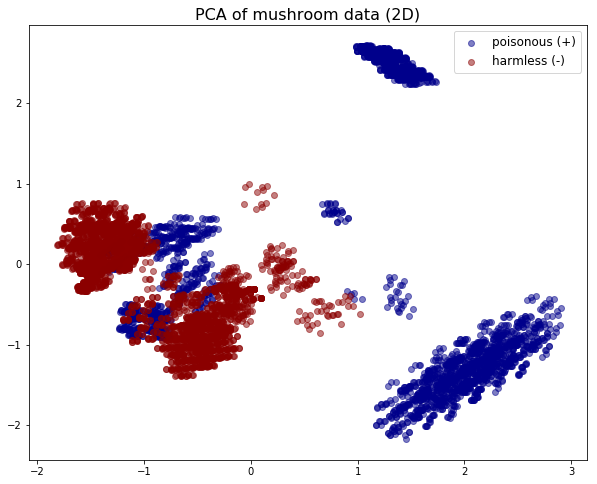

In [6]:
def P2():
### STUDENT START ###
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(train_data)
    
    # Plot
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.scatter(X_2d[train_labels==1, 0], X_2d[train_labels==1, 1], label='poisonous (+)',
               color='darkblue', alpha=.5)
    ax.scatter(X_2d[train_labels==0, 0], X_2d[train_labels==0, 1], label='harmless (-)',
               color='darkred', alpha=.5)
    ax.legend(loc='best', fontsize=12)
    ax.set_title('PCA of mushroom data (2D)', fontsize=16)
    plt.show()

### STUDENT END ###
P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5661999999999999, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.7638, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.3738000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.86, 0.6962000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6337999999999998, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.43619999999999975, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.8261999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996),
 (0.86, 0.33999999999999997, 0.5037999999999996)]

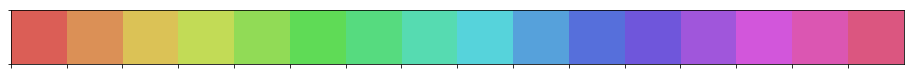

In [7]:
# Creating a palette of 16 colors
MyColors16 = sns.color_palette("hls", 16)
sns.palplot(MyColors16)
MyColors16

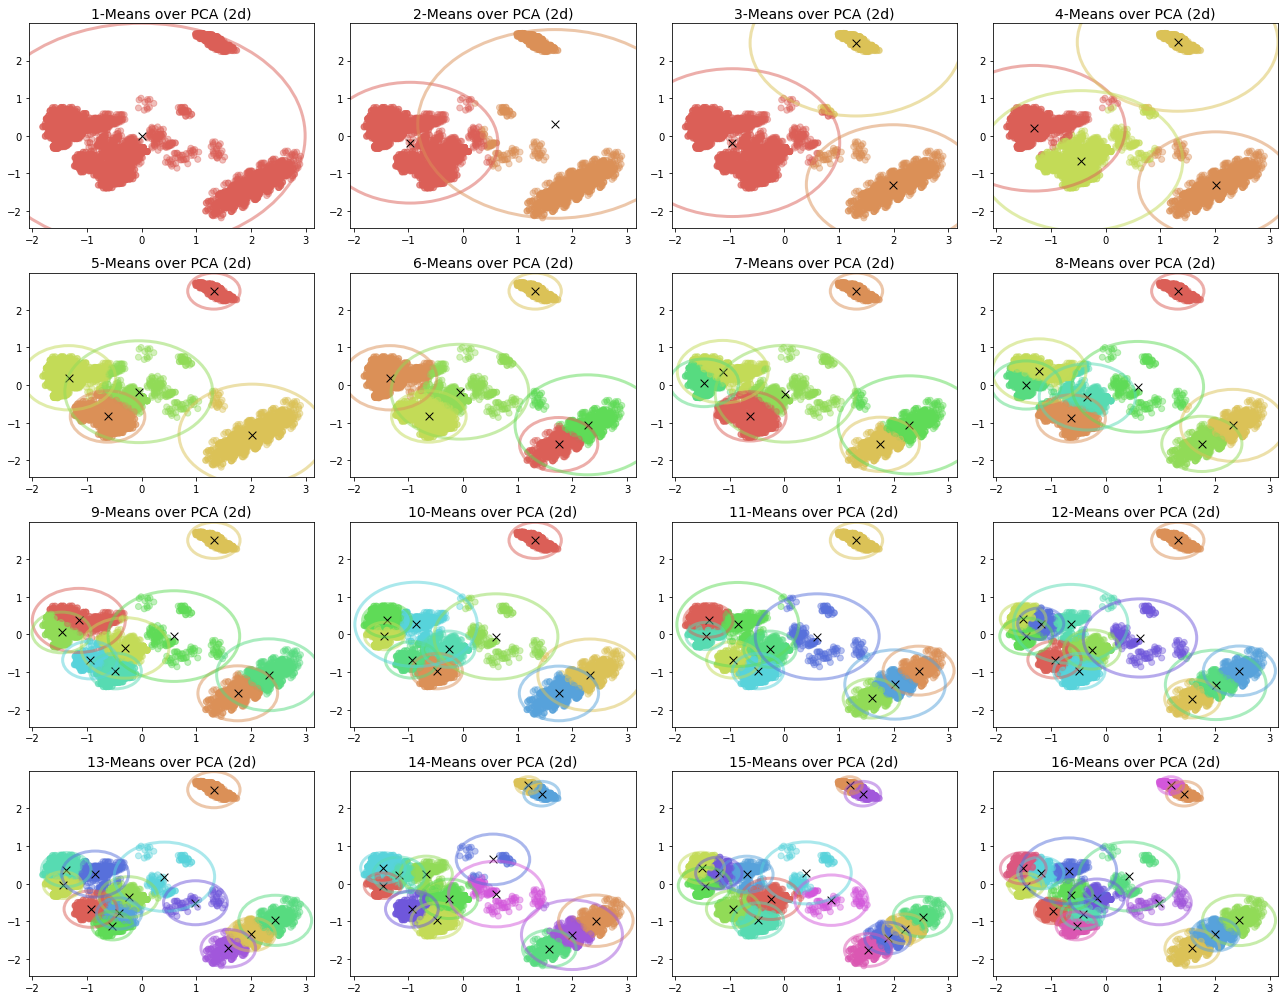

In [8]:
def P3():
### STUDENT START ###
    # Fit and transform data to 2d
    pca = PCA(n_components=2)
    train_2d = pca.fit_transform(train_data)

    # Initialize plot figure
    fig = plt.figure(figsize=(18, 14)) 
    gs = gridspec.GridSpec(4, 4)

    # k is the number of clusters
    for i, g in enumerate(gs):
        k = i + 1
        ax = plt.subplot(g)

        km = KMeans(n_clusters=k, init='k-means++')
        clusters = km.fit(train_2d)

        # Set color labels
        color_labels = [MyColors16[x] for x in clusters.labels_]

        # Get distance to farthest point in the cluster
        distances = km.transform(train_2d)
        dist_df = pd.DataFrame({'distance': distances.min(axis=1), 'label': clusters.labels_})
        radii = dist_df.groupby('label').max()

        # Plot circumference around centroid with radius being the furthest point
        for j in range(radii.shape[0]):
            circle = plt.Circle(clusters.cluster_centers_[j], radius=radii.loc[j], fill=False,
                            color=MyColors16[j], lw=3, alpha=.5)
            ax.add_artist(circle)
        ax.scatter(train_2d[:, 0], train_2d[:, 1], color=color_labels, alpha=.4)
        ax.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], marker='x', c='black', lw=1, s=60)
        ax.set_title('{}-Means over PCA (2d)'.format(k), fontsize=14)

    plt.tight_layout()
    plt.show()

### STUDENT END ###

P3()

(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

**Notes:**
* spherical: (n_components, n_features) --> Variance is the same along all axes and zero across-axes.
* diag(onal): (n_components, n_features) --> Each component has a diagonal covariance matrix (axes uncorrelated).
* tied: (n_features, n_features) --> The same covariance matrix is shared by all the gaussians.
* full: (n_components, n_features, n_features) --> Gaussians with full covariance.

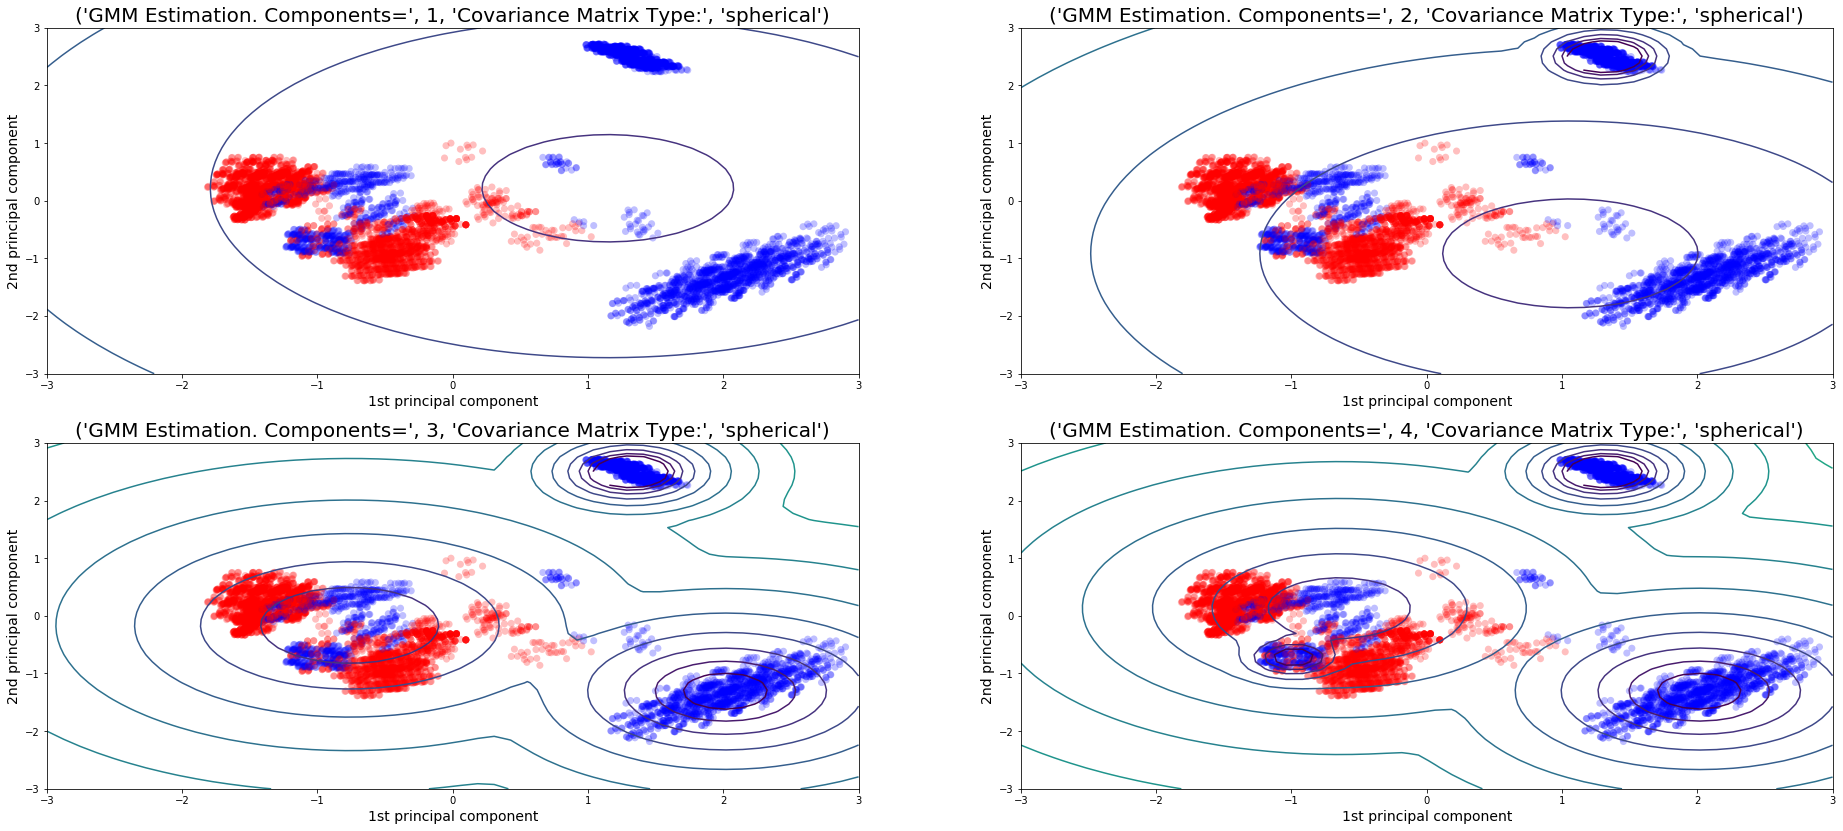

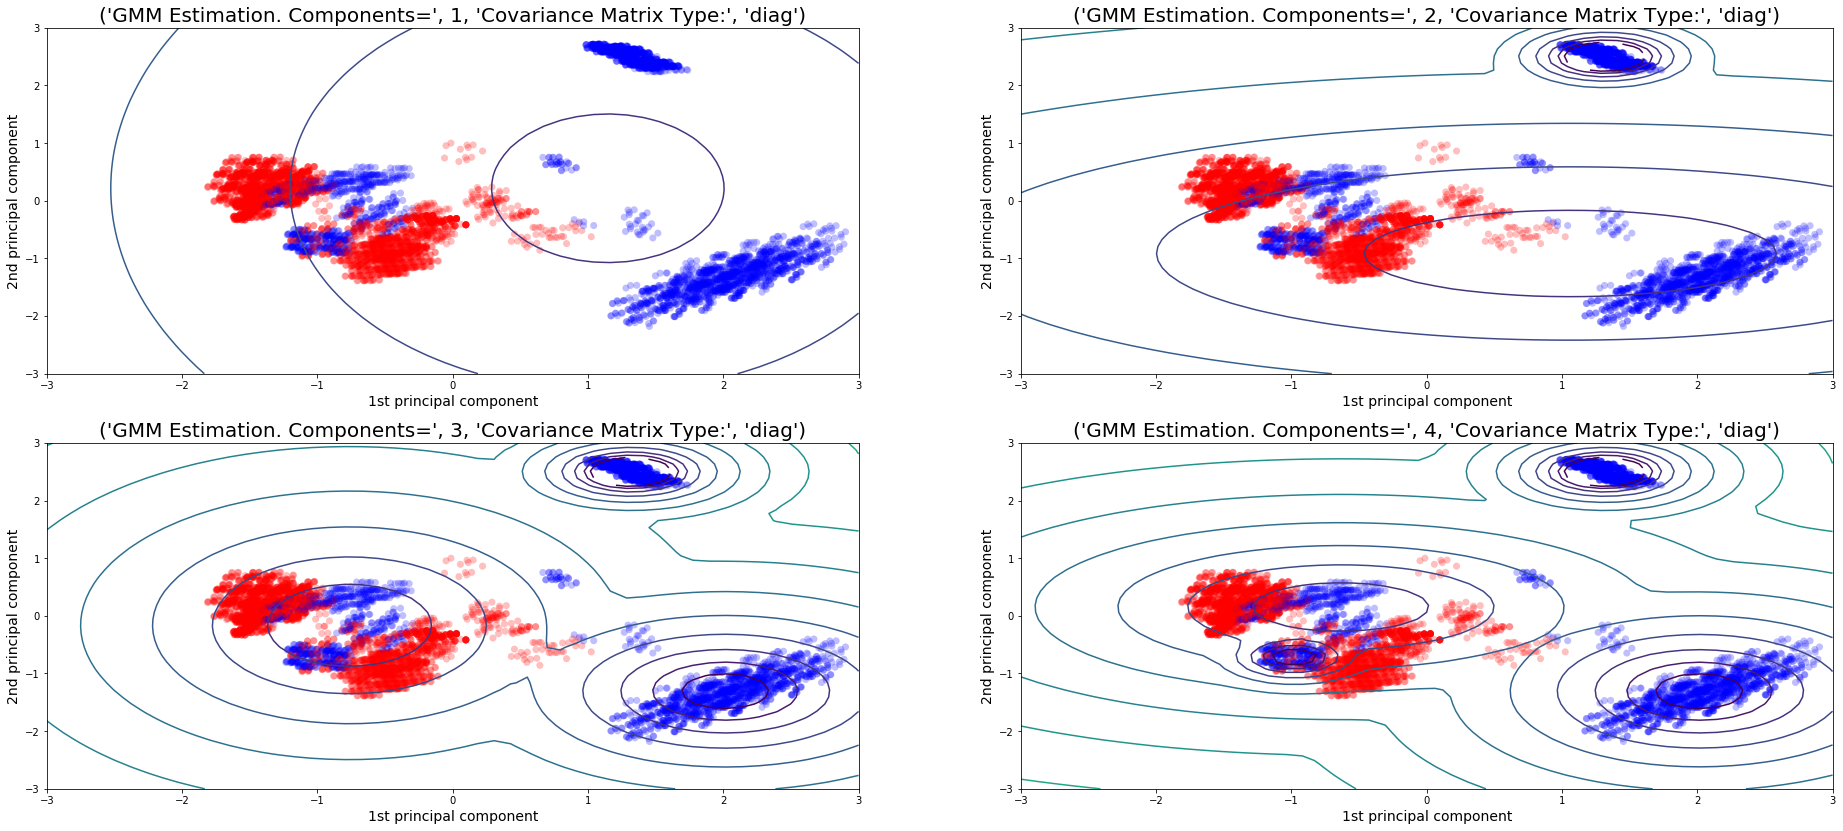

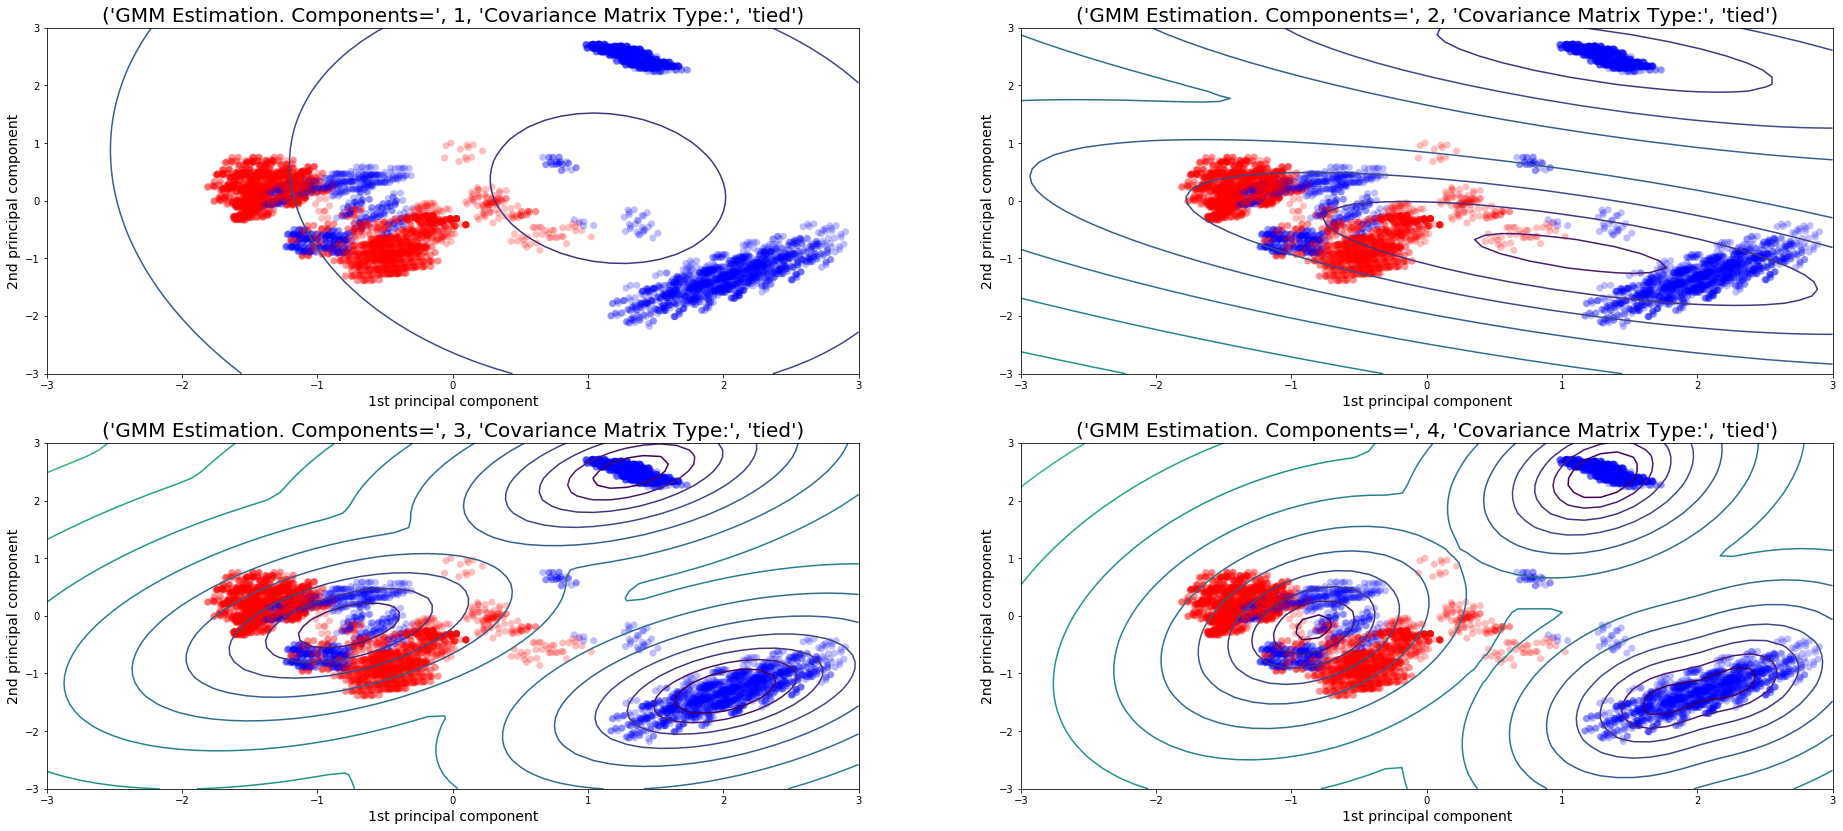

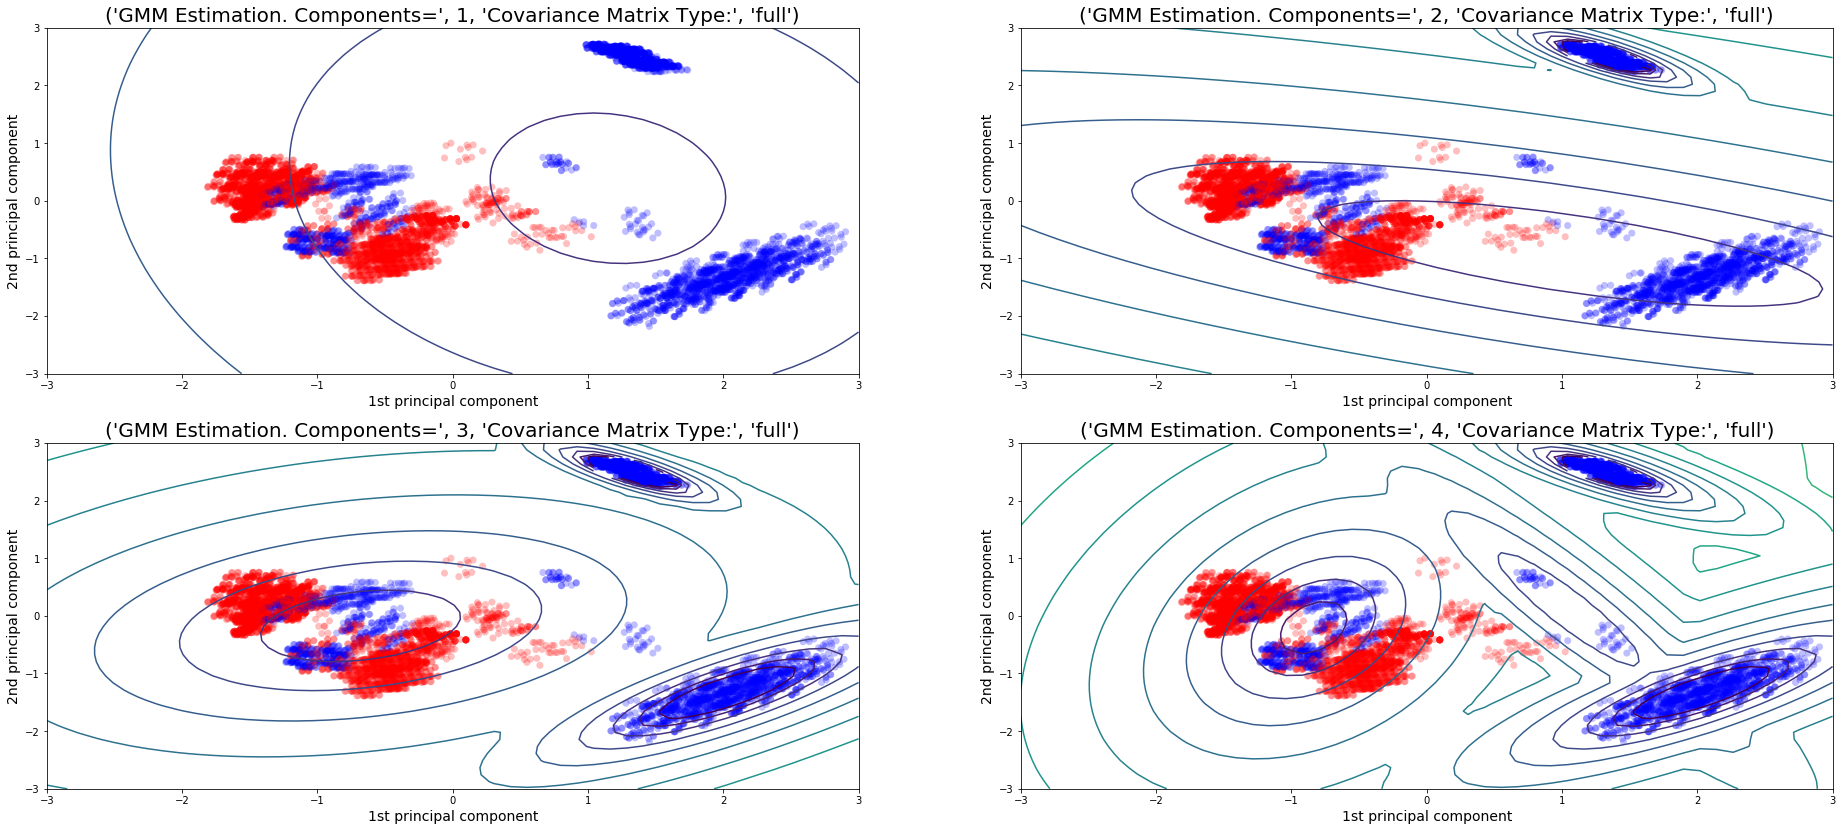

In [9]:
def P4():
### STUDENT START ###
    # Fit and transform data to 2d
    pca = PCA(n_components=2)
    train_2d = pca.fit_transform(train_data)
    # Changing agg.path.chunksize to 10000 to renderer the plot paths in chunks rather than the whole path at once.
    mpl.rcParams['agg.path.chunksize'] = 10000 

    for cov_mat_type in ['spherical', 'diag', 'tied', 'full']:

        # initialize subplot
        f, axarr = plt.subplots(2, 2,figsize=(32,14))
    
        for k in range(1, 5):
            clf = mixture.GaussianMixture(n_components=k, covariance_type=cov_mat_type)
            clf.fit(train_2d[train_labels==1]) 
            x = np.linspace(-3.0, 3.0)
            y = np.linspace(-3.0, 3.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -clf.score_samples(XX)
            Z = Z.reshape(X.shape)
        
            # get subplot
            if k == 1: 
                subplot=axarr[0,0]
            elif k==2:
                subplot=axarr[0,1]
            elif k==3: 
                subplot=axarr[1,0]
            elif k==4:
                subplot=axarr[1,1]
            else:
                print("Invalid k value:", k)
    
            # plot contours and scatter plot
            CS = subplot.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 2, 10))
            colors = np.where(train_labels == 1, 'blue', 'red')      
            subplot.scatter(train_2d[:, 0], train_2d[:, 1], c = colors, alpha = 0.25, s = 50, edgecolor='')

            title = "GMM Estimation. Components=", k, "Covariance Matrix Type:", cov_mat_type
            subplot.set_title(title, size=20)
            subplot.set_xlabel("1st principal component", size=14)
            subplot.set_ylabel("2nd principal component", size=14)
            subplot.axis('tight')

        plt.show()

### STUDENT END ##
P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

pca_components: 2 gmm_components: 4 cov_mat_type:full       accuracy:      0.9377


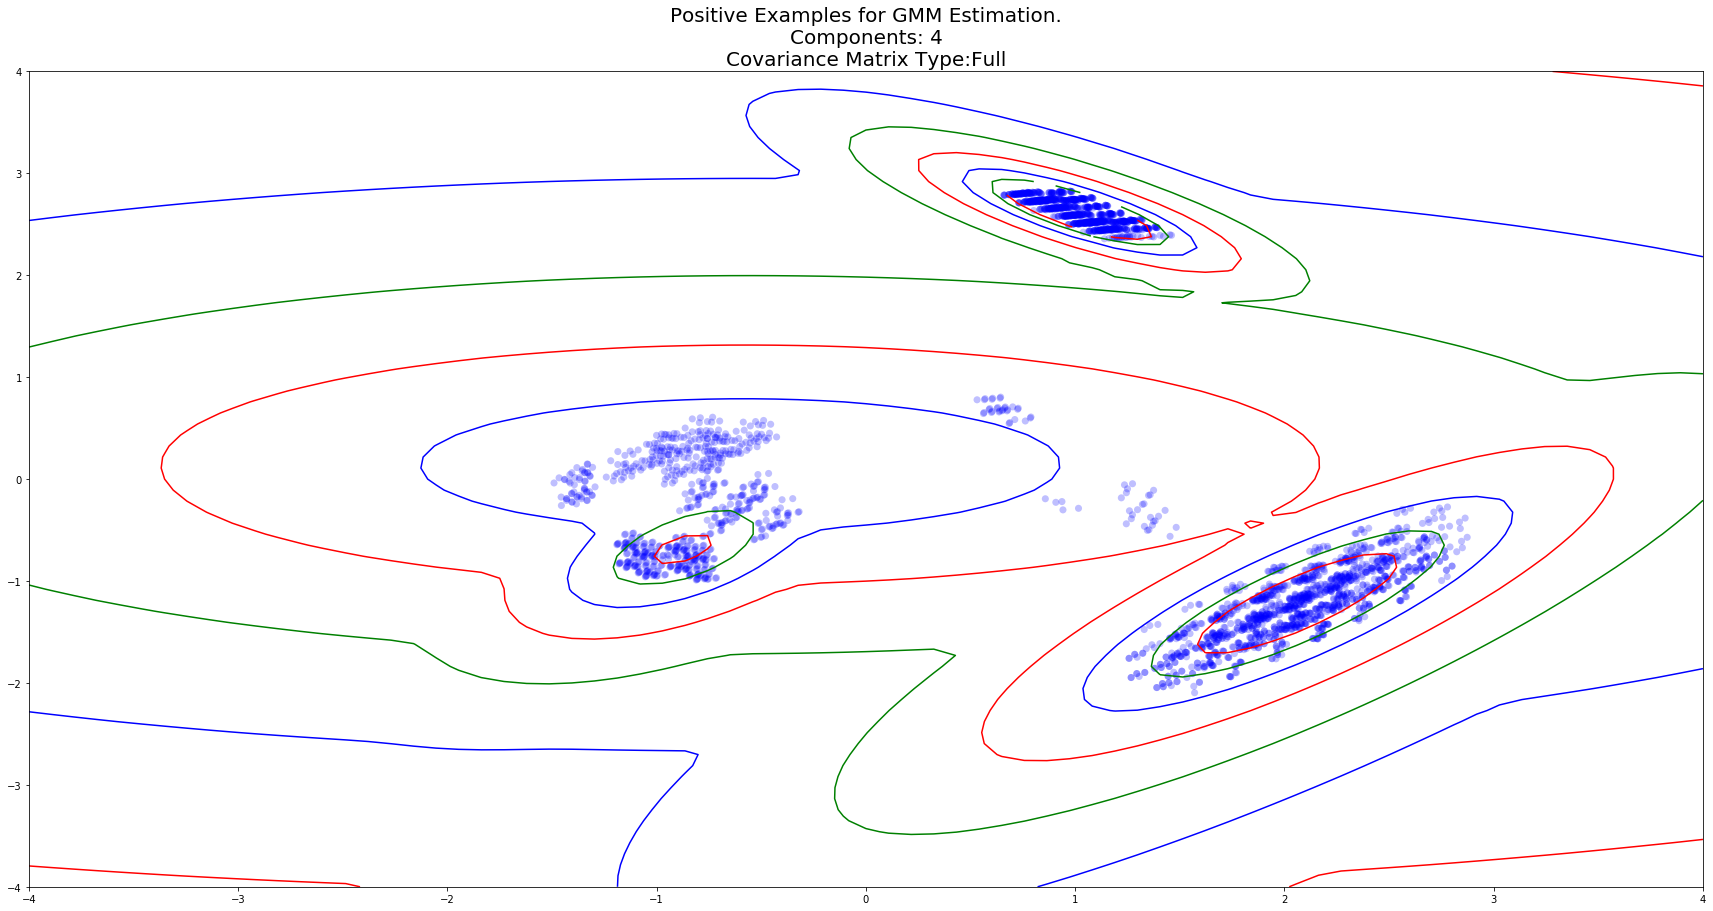

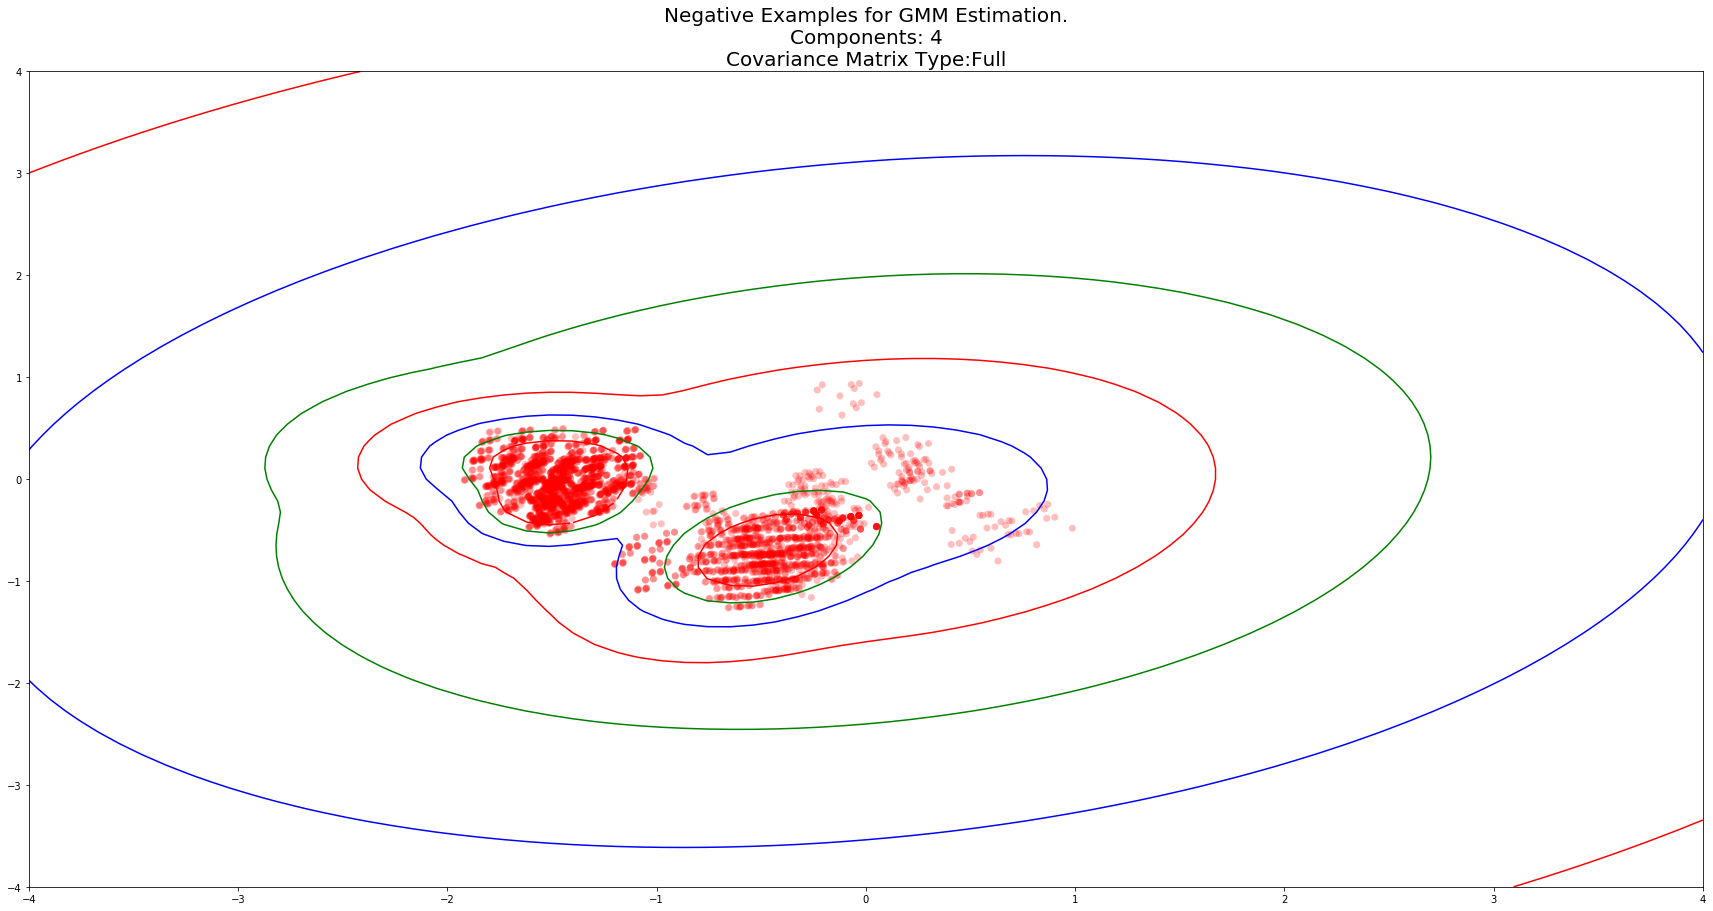

In [10]:
def contour_plot(clf, colors, examples, plot_title):

    # Compute scores for the contour plot
    x = np.linspace(-4,4,75)
    y = np.linspace(-4,4,75)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T
    Z = -clf.score_samples(XX)
    Z = Z.reshape(X.shape)

    # plot contours and scatter plot
    plt.figure(figsize=(30, 15))
    CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                     colors=('r', 'g', 'b'),
                     levels=np.logspace(0, 3, 10))
    plt.scatter(examples[:, 0], examples[:, 1], c = colors, alpha = 0.25, s = 50, edgecolor='')
    plt.title(plot_title, size=20)
    plt.show()

def compute_accuracy(pca_components, gmm_components, cov_mat_type):
    
    reduced_data = PCA(n_components=pca_components).fit_transform(original_X)
    
    train_data_pca = reduced_data[:7000]
    test_data_pca  = reduced_data[7000:]

    pos_examples_indices = np.where(train_labels==1)
    neg_examples_indices = np.where(train_labels==0)

    pos_examples = np.array(train_data_pca)[pos_examples_indices]
    neg_examples = np.array(train_data_pca)[neg_examples_indices]

    # Fit components for GMM (Pos & Neg)
    pos_clf = mixture.GaussianMixture(n_components=gmm_components, covariance_type=cov_mat_type)
    pos_clf.fit(pos_examples)
    neg_clf = mixture.GaussianMixture(n_components=gmm_components, covariance_type=cov_mat_type)
    neg_clf.fit(neg_examples)

    # Initialize with zeros
    predicted_labels = np.zeros_like(test_labels)

    for i in range(1, len(test_data_pca)):
        pos_score = pos_clf.score([test_data_pca[i]])
        neg_score = neg_clf.score([test_data_pca[i]])
        if pos_score >= neg_score:
            predicted_labels[i] = 1
        else:
            predicted_labels[i] = 0
            
    total_matches = (np.count_nonzero(test_labels==predicted_labels))
    total_labels = (len(test_labels))
    accuracy = total_matches/total_labels
    print("pca_components:{0:2d} gmm_components:{1:2d} cov_mat_type:{2:10s} accuracy:{3:12.4f}"
          .format(pca_components,gmm_components,cov_mat_type,accuracy))
    
    #Plot the pos and neg reults
    contour_plot(pos_clf, "blue", pos_examples, 
                 "Positive Examples for GMM Estimation.\nComponents: 4\nCovariance Matrix Type:Full")
    contour_plot(neg_clf, "red", neg_examples, 
                 "Negative Examples for GMM Estimation.\nComponents: 4\nCovariance Matrix Type:Full")

def P5():
    ### STUDENT Start ##

    compute_accuracy(pca_components=2, gmm_components=4, cov_mat_type="full")

    ### STUDENT END ##
P5()

(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [13]:
def compute_accuracy(pca_components, gmm_components, cov_mat_type):
    # Re-used from P5
    
    reduced_data = PCA(n_components=pca_components).fit_transform(original_X)
    
    train_data_pca = reduced_data[:7000]
    test_data_pca  = reduced_data[7000:]

    pos_examples_indices = np.where(train_labels==1)
    neg_examples_indices = np.where(train_labels==0)

    pos_examples = np.array(train_data_pca)[pos_examples_indices]
    neg_examples = np.array(train_data_pca)[neg_examples_indices]

    # Fit components for GMM (Pos & Neg)
    pos_clf = mixture.GaussianMixture(n_components=gmm_components, covariance_type=cov_mat_type)
    pos_clf.fit(pos_examples)
    neg_clf = mixture.GaussianMixture(n_components=gmm_components, covariance_type=cov_mat_type)
    neg_clf.fit(neg_examples)

    # Initialize with zeros
    predicted_labels = np.zeros_like(test_labels)

    for i in range(1, len(test_data_pca)):
        pos_score = pos_clf.score([test_data_pca[i]])
        neg_score = neg_clf.score([test_data_pca[i]])
        if pos_score >= neg_score:
            predicted_labels[i] = 1
        else:
            predicted_labels[i] = 0
            
    total_matches = (np.count_nonzero(test_labels==predicted_labels))
    total_labels = (len(test_labels))
    accuracy = total_matches/total_labels
    print("pca_components:{0:2d} gmm_components:{1:2d} cov_mat_type:{2:10s} accuracy:{3:12.4f}"
          .format(pca_components,gmm_components,cov_mat_type,accuracy))
    
    return accuracy

def P6():
### STUDENT START ###

    np.random.seed(0)
    accuracy = 0
    best_pca_components = 0
    best_gmm_components = 0
    best_cov_mat_type = ""

    for pca_components in [5,10]:
        for gmm_components in [2,4,6,8]:
            for cov_mat_type in ['spherical', 'diag', 'tied', 'full']:
                new_accuracy = compute_accuracy(pca_components=pca_components,gmm_components=gmm_components,
                                                cov_mat_type=cov_mat_type)
                # save the highest results
                if (new_accuracy > accuracy):
                    accuracy = new_accuracy
                    best_pca_components = pca_components
                    best_gmm_components = gmm_components
                    best_cov_mat_type   = cov_mat_type
    print("\nBest Values:")
    print("pca_components:{0:2d} gmm_components:{1:2d} cov_mat_type:{2:10s} accuracy:{3:12.4f}"
          .format(best_pca_components, best_gmm_components, best_cov_mat_type, accuracy))
        
### STUDENT END ###
P6()

pca_components: 5 gmm_components: 2 cov_mat_type:spherical  accuracy:      0.8799
pca_components: 5 gmm_components: 2 cov_mat_type:diag       accuracy:      0.9039
pca_components: 5 gmm_components: 2 cov_mat_type:tied       accuracy:      0.9680
pca_components: 5 gmm_components: 2 cov_mat_type:full       accuracy:      0.9591
pca_components: 5 gmm_components: 4 cov_mat_type:spherical  accuracy:      0.9662
pca_components: 5 gmm_components: 4 cov_mat_type:diag       accuracy:      0.9778
pca_components: 5 gmm_components: 4 cov_mat_type:tied       accuracy:      0.9804
pca_components: 5 gmm_components: 4 cov_mat_type:full       accuracy:      0.9804
pca_components: 5 gmm_components: 6 cov_mat_type:spherical  accuracy:      0.9804
pca_components: 5 gmm_components: 6 cov_mat_type:diag       accuracy:      0.9858
pca_components: 5 gmm_components: 6 cov_mat_type:tied       accuracy:      0.9804
pca_components: 5 gmm_components: 6 cov_mat_type:full       accuracy:      0.9929
pca_components: 